In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.astype(bool).sum(axis=0)

Pregnancies                 657
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     268
dtype: int64

In [5]:
target_y = df.Outcome.tolist()
target_name = list(map(str, target_y))

In [6]:
df_data = df.loc[:, (df.columns != 'Outcome')]

In [7]:
X_original = df_data.as_matrix()

X_std = (df_data - df_data.mean()) / df_data.std()
X_std = X_std.as_matrix()

X_norm = (df_data - df_data.min()) / (df_data.max() - df_data.min())
X_norm = X_norm.as_matrix()

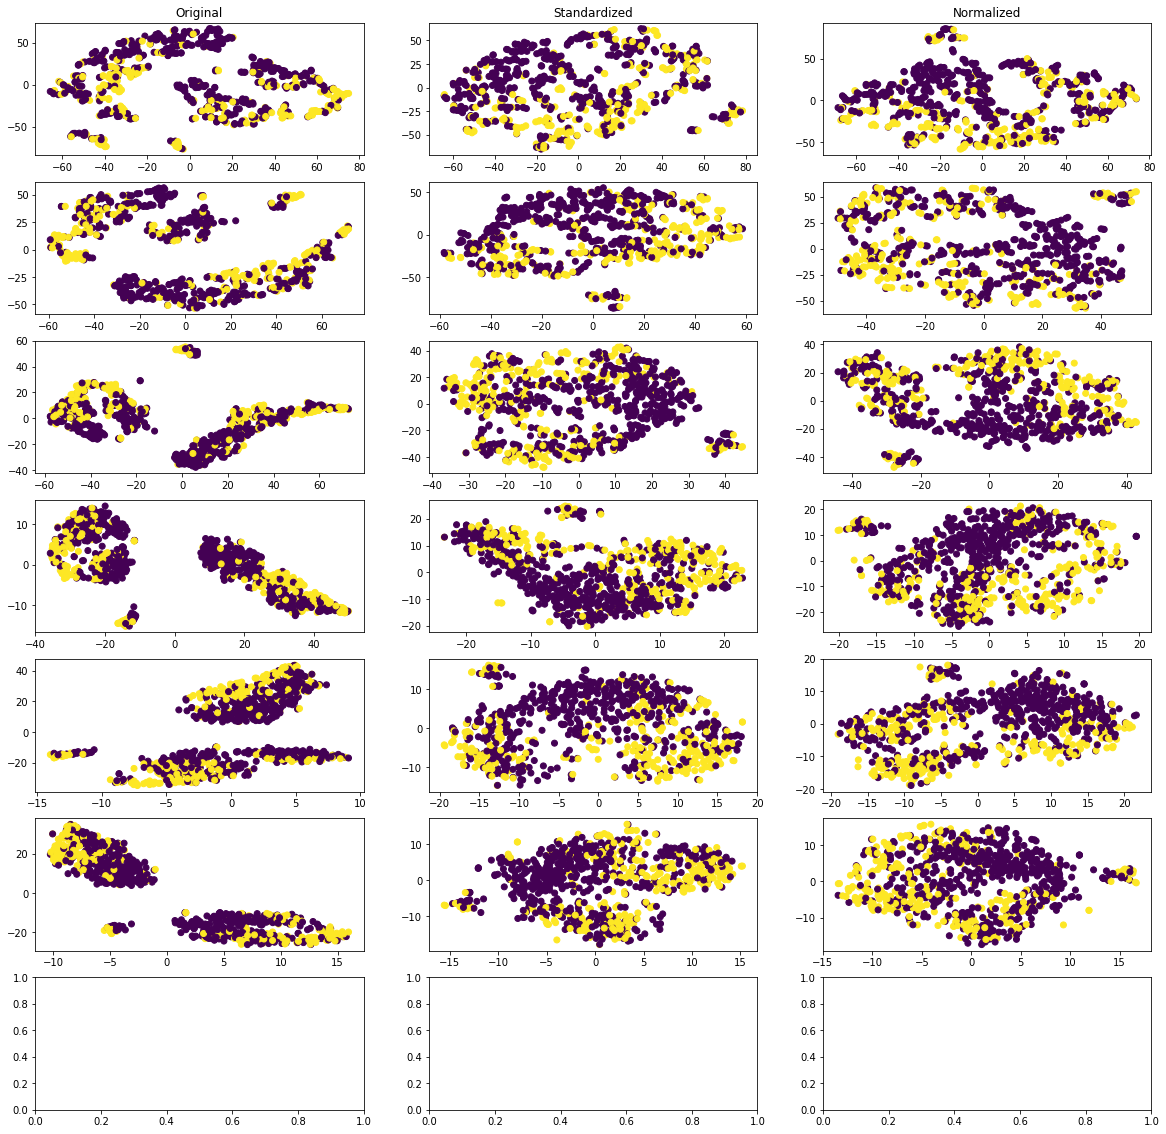

In [8]:
from sklearn.manifold import TSNE

fig, axes = plt.subplots(7, 3, figsize=(20,20))
axes[0][0].set_title('Original')
axes[0][1].set_title('Standardized')
axes[0][2].set_title('Normalized')

# perps = [2, 5, 10, 20, 50, 60, 75]
perps = [7, 10, 20, 50, 60, 75]

for i, perp in enumerate(perps):
    tsne = TSNE(perplexity=perp)
    X2d0 = tsne.fit_transform(X_original)
    X2d1 = tsne.fit_transform(X_std)
    X2d2 = tsne.fit_transform(X_norm)
    
    axes[i][0].scatter(X2d0[:,0], X2d0[:,1], c=target_y)
    axes[i][1].scatter(X2d1[:,0], X2d1[:,1], c=target_y)
    axes[i][2].scatter(X2d2[:,0], X2d2[:,1], c=target_y)
    
plt.show()

KeyboardInterrupt: 

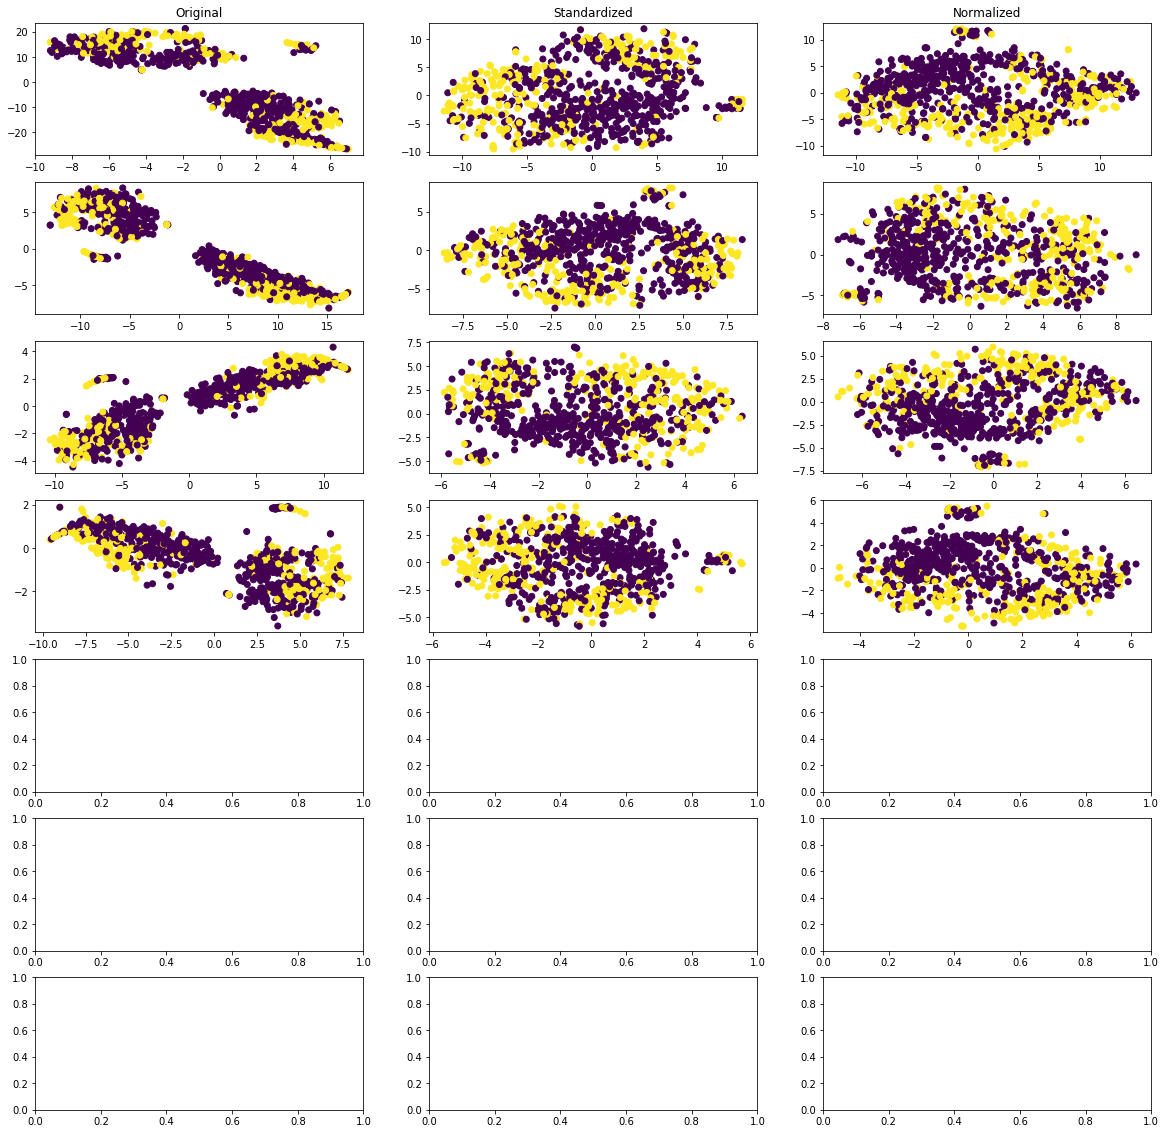

In [9]:
from sklearn.manifold import TSNE

fig, axes = plt.subplots(7, 3, figsize=(20,20))
axes[0][0].set_title('Original')
axes[0][1].set_title('Standardized')
axes[0][2].set_title('Normalized')

# perps = [2, 5, 10, 20, 50, 60, 75]
perps = [100, 150, 200, 250, 300, 400, 500]

for i, perp in enumerate(perps):
    tsne = TSNE(perplexity=perp)
    X2d0 = tsne.fit_transform(X_original)
    X2d1 = tsne.fit_transform(X_std)
    X2d2 = tsne.fit_transform(X_norm)
    
    axes[i][0].scatter(X2d0[:,0], X2d0[:,1], c=target_y)
    axes[i][1].scatter(X2d1[:,0], X2d1[:,1], c=target_y)
    axes[i][2].scatter(X2d2[:,0], X2d2[:,1], c=target_y)
    
plt.show()

In [11]:
pickle_data = {
    'data': X_std,
    'y': np.array(target_y),
    'labels': target_name
}

pickle.dump(pickle_data, open('diabetes.pickle', 'wb'))

In [12]:
def load_pickle(name, limit_size=2000):
    inputName = '{}.pickle'.format(name)
    dataset = pickle.load(open(inputName, 'rb'))
    X, labels = dataset['data'], dataset['labels']
    n = min(limit_size, X.shape[0])
    X = X[:n]
    labels = labels[:n]
    if 'y' in dataset:
        y = dataset['y'][:n]
    else:
        y = np.zeros(n)
    print("Data from pickle: ", X.shape, y.shape, len(labels))
    return X, y, labels

# test load pickle file
load_pickle('diabetes')

Data from pickle:  (768, 8) (768,) 768


(array([[ 0.63953049,  0.84777132,  0.1495433 , ...,  0.20387991,
          0.46818687,  1.42506672],
        [-0.84433482, -1.12266474, -0.16044119, ..., -0.68397621,
         -0.36482303, -0.19054773],
        [ 1.23307662,  1.94245802, -0.26376935, ..., -1.10253696,
          0.6040037 , -0.10551539],
        ..., 
        [ 0.34275743,  0.00329872,  0.1495433 , ..., -0.73471085,
         -0.68474712, -0.27558007],
        [-0.84433482,  0.15968254, -0.47042568, ..., -0.24004815,
         -0.37085933,  1.1699697 ],
        [-0.84433482, -0.87245064,  0.04621514, ..., -0.20199718,
         -0.4734765 , -0.87080644]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,